In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

def pca_analysis(mpu_num):

    # Change this to your actual filename
    filename = f"mpu{mpu_num}_data.txt"

    # Load the file into a DataFrame
    df = pd.read_csv(filename, header=None, names=['time', 'gx', 'gy', 'gz', 'ax', 'ay', 'az'])

    # Extract gyroscope columns
    gyro_data = df[['gx', 'gy', 'gz']].values

    # Perform PCA
    pca = PCA(n_components=3)
    pca.fit(gyro_data)

    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    principal_axis = pca.components_[0]

    print("Variance explained by principal axis (PC1) in MPU #{}: {:.2%}".format(mpu_num, explained_variance[0]))
    print("Principal axis (in sensor coordinates) in MPU #{}:", principal_axis)

for i in range(1, 5):
    pca_analysis(i)


Variance explained by principal axis (PC1) in MPU #1: 97.48%
Principal axis (in sensor coordinates) in MPU #{}: [0.25246345 0.92360996 0.28845599]
Variance explained by principal axis (PC1) in MPU #2: 96.00%
Principal axis (in sensor coordinates) in MPU #{}: [-0.1785347   0.73366519  0.65563767]
Variance explained by principal axis (PC1) in MPU #3: 94.46%
Principal axis (in sensor coordinates) in MPU #{}: [-0.26444315  0.78469925 -0.56063973]
Variance explained by principal axis (PC1) in MPU #4: 95.93%
Principal axis (in sensor coordinates) in MPU #{}: [ 0.99476302  0.01457841 -0.10116324]


### Calculating resting gravity vector

In [20]:
import numpy as np
import pandas as pd

def gravity_vec():
    filename = "resting_gravity.txt"

    # Let pandas read the header automatically
    df = pd.read_csv(filename)

    # Drop rows that contain strings (like a duplicated header row)
    df = df[pd.to_numeric(df['ax'], errors='coerce').notna()]

    # Convert acceleration data to float
    accel_data = df[['ax', 'ay', 'az']].astype(float).values

    # Compute mean gravity vector
    mean_x = accel_data[:, 0].mean()
    mean_y = accel_data[:, 1].mean()
    mean_z = accel_data[:, 2].mean()

    gravity_vector = np.array([mean_x, mean_y, mean_z])
    gravity_unit = gravity_vector / np.linalg.norm(gravity_vector)

    print("Gravity unit vector (resting position):", gravity_unit)
    return gravity_unit

gravity_vec()


Gravity unit vector (resting position): [-0.99630919  0.08571872  0.00450555]


array([-0.99630919,  0.08571872,  0.00450555])

### Visualizing low-pass filter

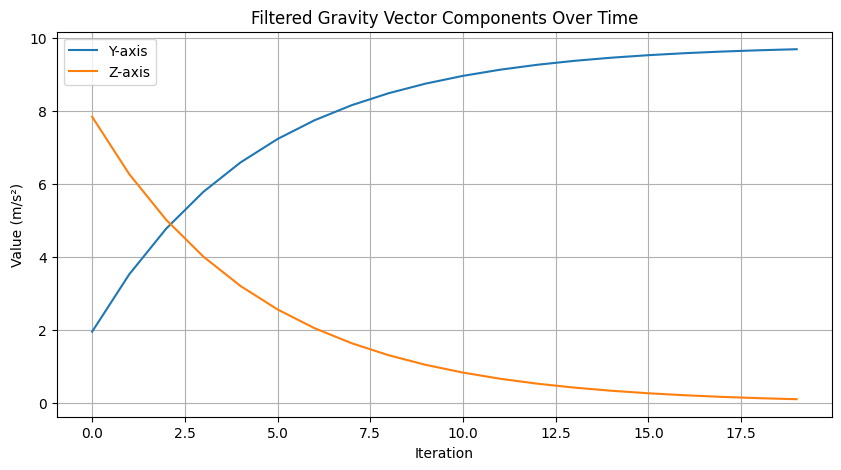

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Initial gravity vector (e.g., standing upright)
gravity_vec = np.array([0, 0, 9.81])

# New gravity vector after the leg moves (e.g., raised leg)
new_gravity_vec = np.array([0, 9.81, 0])

# Low-pass filter parameter
alpha = 0.8

# Logging
x, y, z = [], [], []

# Apply filter over multiple steps
for i in range(20):
    gravity_vec = alpha * gravity_vec + (1 - alpha) * new_gravity_vec
    x.append(gravity_vec[0])
    y.append(gravity_vec[1])
    z.append(gravity_vec[2])

# Plot the Y and Z axis values
plt.figure(figsize=(10, 5))
plt.plot(y, label='Y-axis')
plt.plot(z, label='Z-axis')
plt.title('Filtered Gravity Vector Components Over Time')
plt.xlabel('Iteration')
plt.ylabel('Value (m/s²)')
plt.legend()
plt.grid()
plt.show()
